# Merge to single Dataframe

In [1]:
import pandas as pd
import seaborn as sns
import glob
%matplotlib inline

## TODO
### Check for missing data
### Write function that evaluates each model for each currency

In [2]:
df = pd.read_pickle('/home/patrick/Documents/Alt Coin Proj/data/newfeat.pkl')
df = df['DOGE']

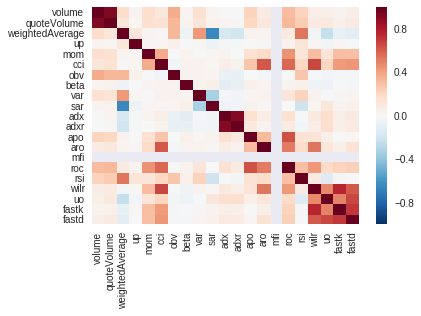

In [3]:
df = df.drop(['high','low', 'open', 'close'],axis=1)
sns.heatmap(df.corr())

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [5]:

crypt = df[['up','weightedAverage', 'roc','cci','rsi']]
trainX = crypt[crypt['up'].first_valid_index():'2017-05-30 00:00:00'].drop('up',axis=1)
trainY = crypt[crypt['up'].first_valid_index():'2017-05-30 00:00:00']['up']
testX = crypt['2017-06-01 04:00:00':crypt['up'].last_valid_index()].drop('up',axis=1)
testY = crypt['2017-06-01 04:00:00':crypt['up'].last_valid_index()]['up']

print  'LTC  Logistic Regression'

logmodel = LogisticRegression()
logmodel.fit(trainX,trainY)
pred = logmodel.predict(testX)
print classification_report(testY,pred)
print confusion_matrix(testY,pred)



LTC  Logistic Regression
             precision    recall  f1-score   support

        0.0       0.60      1.00      0.75       255
        1.0       0.00      0.00      0.00       168

avg / total       0.36      0.60      0.45       423

[[255   0]
 [168   0]]


/home/patrick/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:

#crypt = df
trainX = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00'].drop('up',axis=1)
trainY = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00']['up']
testX = crypt['2017-01-01 04:00:00':crypt['up'].last_valid_index()].drop('up',axis=1)
testY = crypt['2017-01-01 04:00:00':crypt['up'].last_valid_index()]['up']

print 'LTC SVC'



param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(trainX,trainY)
grid.best_estimator_
grid_predictions = grid.predict(testX)
print classification_report(testY,grid_predictions)
print confusion_matrix(testY,grid_predictions)

LTC SVC


In [6]:

crypt = df
trainX = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00'].drop('up',axis=1)
trainY = crypt[crypt['up'].first_valid_index():'2017-01-01 00:00:00']['up']
testX = crypt['2017-05-01 04:00:00':crypt['up'].last_valid_index()].drop('up',axis=1)
testY = crypt['2017-05-01 04:00:00':crypt['up'].last_valid_index()]['up']

print  'LTC Tree'

model = DecisionTreeClassifier()
model.fit(trainX,trainY)
pred = model.predict(testX)
print classification_report(testY,pred)
print confusion_matrix(testY,pred)

LTC Tree
             precision    recall  f1-score   support

        0.0       0.61      0.26      0.36       373
        1.0       0.39      0.74      0.51       236

avg / total       0.52      0.44      0.42       609

[[ 96 277]
 [ 61 175]]
